In [62]:
import mlrose_hiive as mr
from mlrose_hiive.decorators import short_name
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
sns.set_style("whitegrid")

In [37]:
#Four Peaks
fpeaks_fitness = mr.FourPeaks()

In [38]:
problem = mr.DiscreteOpt(length = 64,
                         fitness_fn = fpeaks_fitness,
                         maximize = True,
                         max_val = 2)

In [39]:
start_time = time.perf_counter()
rhc_best_state, rhc_best_fitness, rhc_curve = mr.random_hill_climb(problem=problem,
                       random_state=42,
                       max_iters = 5000,
                       max_attempts=1000,
                       restarts=100,
                       curve = True)
rhc_time = time.perf_counter() - start_time
print("RHC best fitness: {0:.0f} in {1:.4f} seconds and {2} iterations".format(rhc_best_fitness, rhc_time, len(rhc_curve)))

RHC best fitness: 120 in 6.7554 seconds and 2708 iterations


In [41]:
sa_schedule = mr.ExpDecay()
start_time = time.perf_counter()
sa_best_state, sa_best_fitness, sa_curve = mr.simulated_annealing(problem,
                                                                      schedule=sa_schedule,
                                                                      max_attempts=1000,
                                                                      max_iters=5000,
                                                                      curve=True,
                                                                      random_state=42)
sa_time = time.perf_counter() - start_time
print("SA best fitness: {0:.0f} in {1:.4f} seconds and {2} iterations".format(sa_best_fitness, sa_time, len(sa_curve)))

SA best fitness: 120 in 0.1459 seconds and 2131 iterations


In [42]:
ga_max_attempts = 1000
ga_max_iters = 5000
ga_pop_size = 200
ga_mutation_prob = 0.2
start_time = time.perf_counter()
ga_best_state, ga_best_fitness, ga_curve = mr.genetic_alg(problem,
                                                              pop_size=ga_pop_size,
                                                              mutation_prob=ga_mutation_prob,
                                                              max_attempts=ga_max_attempts,
                                                              max_iters=ga_max_iters,
                                                              curve=True,
                                                              random_state=42)
ga_time = time.perf_counter() - start_time
print("GA fitness {0:.0f} in {1:.4f} seconds and {2} iterations".format(ga_best_fitness, ga_time, len(ga_curve)))
# print('GA best state:\n', ga_best_state)

GA fitness 120 in 18.2630 seconds and 1124 iterations


In [43]:
#mimic
mimic_max_attempts = 1000
mimic_max_iters = 5000
mimic_pop_size = 200
mimic_keep_pct = 0.5
start_time = time.perf_counter()
mimic_best_state, mimic_best_fitness, mimic_curve = mr.mimic(problem,
                                                                 pop_size=mimic_pop_size,
                                                                 keep_pct=mimic_keep_pct,
                                                                 max_attempts=mimic_max_attempts,
                                                                 max_iters=mimic_max_iters,
                                                                 curve=True,
                                                                 random_state=42)
mimic_time = time.perf_counter() - start_time
print("MIMIC fitness {0:.0f} in {1:.4f} seconds and {2} iterations".format(mimic_best_fitness, mimic_time, len(mimic_curve)))


MIMIC fitness 80 in 1834.3890 seconds and 1033 iterations


In [44]:
df = pd.DataFrame({'RHC':[x[0] for x in rhc_curve[:1000]],
                   'SA': [x[0] for x in sa_curve[:1000]],
                   'GA': [x[0] for x in ga_curve[:1000]],
                   'MIMIC': [x[0] for x in mimic_curve[:1000]]})

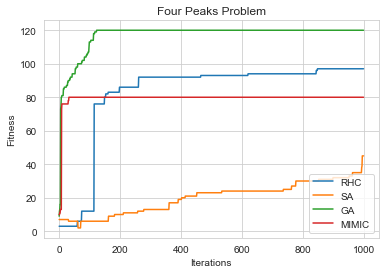

In [63]:
ax = df.plot(title = 'Four Peaks Problem')
ax.set_xlabel("Iterations")
ax.set_ylabel("Fitness")
ax.legend(loc = 'lower right')
